In [12]:
import numpy as np
import pandas as pd
import re as re
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("data/data_clean.csv", mangle_dupe_cols=True)

In [14]:
data.reset_index(inplace=True)

In [15]:
data.head()

,index,Label,losing,derivative,object,chairman,pristine,drought,superpower,generation,...,antiquity,welcome,weak,boost,reserve,likud,import,cameron,christopher,queen
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.200504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X = data.iloc[:,data.columns != "Label"].values
y = data.iloc[:,data.columns == "Label"].values

# Basic DNN

In [17]:
import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [24]:
y_pred=to_categorical(y)

In [25]:
nnmodel=Sequential()
nnmodel.add(Dense(1024,activation='relu',input_dim=X.shape[1]))
nnmodel.add(Dropout(0.5))
nnmodel.add(Dense(1024,activation='relu'))
nnmodel.add(Dropout(0.5))
nnmodel.add(Dense(1024,activation='relu'))
nnmodel.add(Dropout(0.5))
nnmodel.add(Dense(1024,activation='relu'))
nnmodel.add(Dropout(0.5))
nnmodel.add(Dense(2,activation='softmax'))
nnmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
nnmodel.fit(X, y_pred,
          batch_size=128,
          epochs=5,
          verbose=1,validation_split=0.2)

Train on 1591 samples, validate on 398 samples
Epoch 1/5
1591/1591 [==============================] - 4s 3ms/step - loss: 7.3126 - acc: 0.5009 - val_loss: 7.9376 - val_acc: 0.5075
Epoch 2/5
1591/1591 [==============================] - 3s 2ms/step - loss: 7.3463 - acc: 0.5424 - val_loss: 7.9376 - val_acc: 0.5075
Epoch 3/5
1591/1591 [==============================] - 3s 2ms/step - loss: 7.3529 - acc: 0.5424 - val_loss: 7.9376 - val_acc: 0.5075
Epoch 4/5
1591/1591 [==============================] - 3s 2ms/step - loss: 7.3542 - acc: 0.5424 - val_loss: 7.9376 - val_acc: 0.5075
Epoch 5/5
1591/1591 [==============================] - 3s 2ms/step - loss: 7.3541 - acc: 0.5424 - val_loss: 7.9376 - val_acc: 0.5075


# Machine Learning Ways

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/cheviethai/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cheviethai/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cheviethai/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/cheviethai/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in vers

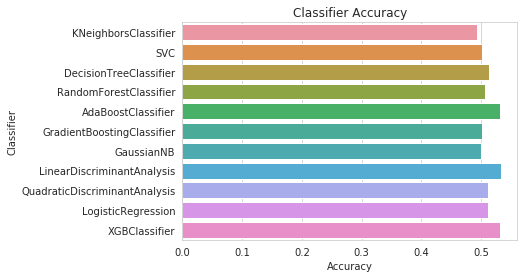

In [22]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
        
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_style("whitegrid")
sns.barplot(x='Accuracy', y='Classifier', data=log)